In [1]:
#install and import libraries
import sys

!conda install --yes --prefix {sys.prefix} -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from Functions import *

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
#read in final dataset
file = '..\Data\Final_Data.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Code
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,1
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,Y,23,8,1,6.0,3,5,1,4,1
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,Y,15,8,3,5.0,2,5,0,3,0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,Y,11,8,3,13.0,5,8,7,5,0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,Y,12,8,2,9.0,2,6,0,4,0


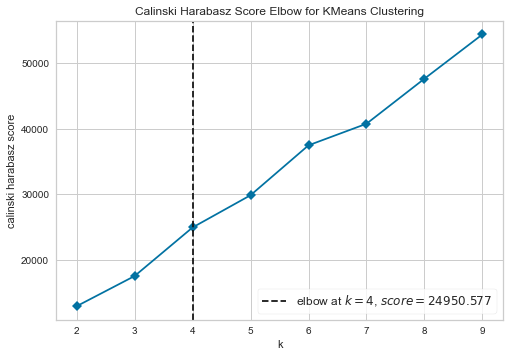

In [3]:
#determine kmeans groups
kmeans_groups(min=2, max=10, df = df[['TotalWorkingYears', 'MonthlyIncome', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'YearsWithCurrManager']])

In [5]:
#4 groupings were deemed appropriate based on the score about
#plot kmeans groups
k_means, y_hat = kmeans_clust (n_clusters=4, df=df[['TotalWorkingYears', 'MonthlyIncome', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'YearsWithCurrManager']])


df['Predict_FortyVertical'] = y_hat

df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Code,Predict_FortyVertical
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,11,8,0,1.0,6,1,0,0,1,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,23,8,1,6.0,3,5,1,4,1,2
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,15,8,3,5.0,2,5,0,3,0,1
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,11,8,3,13.0,5,8,7,5,0,3
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,12,8,2,9.0,2,6,0,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,29,No,Travel_Rarely,Sales,4,3,Other,1,Female,2,...,18,8,0,6.0,2,6,1,5,1,2
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,17,8,1,10.0,5,3,0,2,1,0
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,15,8,0,10.0,2,3,0,2,0,2


In [6]:
#save new dataset to csv
file = '..\\Data\\Pred.csv'
df.to_csv(file)